# Twitter Crawling - 연남동

## tweepy의 문제점
최근 7일밖에 가져오지 못함.

우리가 보려는 것은 과거부터 현재데이터이므로 twitter에서 제공하는 API를 사용할수 없다. 

과거 데이터를 가져오려면 돈을 지불해야 함

## 극복방안
selenium을 통해 동적 크롤링을 했다.

chrome은 느리다는 말이 있어서 firefox를 이용했고 geckodriver로 크롤링 시행

'연남' 키워드 검색 -> 내연남이 너무 많이 포함됨 -> 내연남 키워드를 빼도록 url에 설정했지만 어찌된일인지 내연남 트윗들만 검색됨(?,,) -> '연남동'으로 키워드 대체

## 한계점
중간중간 트래픽이 폭주했다고..

모든 데이터를 뽑는데 시간이 너무 오래 걸린다. 201201, 201301 이런식으로 각 년도 1월달만 뽑으려 했으나 31일씩 하는데도 오래걸려서 오히려 각 월별 1일을 뽑아 비교해보는게 어떨가 싶었다

In [1]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.firefox.firefox_binary import  FirefoxBinary
from selenium.webdriver.common.desired_capabilities import  DesiredCapabilities
import time
from selenium.webdriver.common.keys import Keys
import datetime as dt
import pandas as pd

In [2]:
binary=FirefoxBinary('C:/Program Files/Mozilla Firefox/firefox.exe')
browser=webdriver.Firefox(executable_path='geckodriver.exe',firefox_binary=binary)

In [30]:
startdate=dt.date(year=2018,month=1,day=1)
untildate=dt.date(year=2018,month=1,day=2)
enddate=dt.date(year=2018,month=2,day=1)

In [32]:
totalfreq=[]
while not enddate==startdate:
    url='https://twitter.com/search?q=연남동%20since%3A'+str(startdate)+'%20until%3A'+str(untildate)+'&amp;amp;amp;amp;amp;amp;lang=eg'
    browser.get(url)
    html = browser.page_source
    soup=BeautifulSoup(html,'html.parser')
    
    lastHeight = browser.execute_script("return document.body.scrollHeight")
    while True:
        dailyfreq={'Date':startdate}
#     i=0 i는 페이지수
        wordfreq=0
        tweets=soup.find_all("p", {"class": "TweetTextSize"})
        wordfreq+=len(tweets)
            
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)
        
        newHeight = browser.execute_script("return document.body.scrollHeight")
        print(newHeight)
        if newHeight != lastHeight:
            html = browser.page_source
            soup=BeautifulSoup(html,'html.parser')
            tweets=soup.find_all("p", {"class": "TweetTextSize"})
            wordfreq=len(tweets)
        else:
            dailyfreq['Frequency']=wordfreq
            wordfreq=0
            totalfreq.append(dailyfreq)
            startdate=untildate
            untildate+=dt.timedelta(days=1)
            dailyfreq={}
            break
#         i+=1
        lastHeight = newHeight

8277
8277
9309
9327
9327
4086
4086
8758
8758
6799
6817
6817
8454
8562
8562
7779
7779
8899
8917
8917
9213
9231
9231
7664
12890
15510
19127
19145
19145
9917
10137
10137
6605
6605
7195
7195
7056
7056
8531
8639
8639
7990
8271
8271
7931
8862
8862
10552
10552
7466
7484
7484
9210
9228
9228
6835
6835
8196
8196
6350
6586
6586
8671
8689
8689
8303
8357
8357
7699
7699
7728
7728
7881
7881
8659
8677
8677
6311
6561
6793
6793
8564
8564


In [33]:
df_201801 = pd.DataFrame(totalfreq)

In [29]:
df_201701 = pd.DataFrame(totalfreq)

In [25]:
df_201601 = pd.DataFrame(totalfreq)

In [21]:
df_201501 = pd.DataFrame(totalfreq)

In [16]:
df_201401 = pd.DataFrame(totalfreq)

In [11]:
df_201301 = pd.DataFrame(totalfreq)

In [6]:
df_201201 = pd.DataFrame(totalfreq)

In [7]:
df_201201

,Date,Frequency
0,2012-01-01,6
1,2012-01-02,12
2,2012-01-03,11
3,2012-01-04,13
4,2012-01-05,14
5,2012-01-06,10
6,2012-01-07,14
7,2012-01-08,13
8,2012-01-09,8
9,2012-01-10,15


In [12]:
df_201301

,Date,Frequency
0,2013-01-01,6
1,2013-01-02,11
2,2013-01-03,22
3,2013-01-04,33
4,2013-01-05,18
5,2013-01-06,19
6,2013-01-07,22
7,2013-01-08,9
8,2013-01-09,14
9,2013-01-10,15


In [17]:
df_201401

,Date,Frequency
0,2014-01-01,12
1,2014-01-02,15
2,2014-01-03,26
3,2014-01-04,19
4,2014-01-05,16
5,2014-01-06,15
6,2014-01-07,23
7,2014-01-08,17
8,2014-01-09,37
9,2014-01-10,35


In [79]:
df_201501

,Date,Frequency
0,2015-01-01,13
1,2015-01-02,17
2,2015-01-03,20
3,2015-01-04,32
4,2015-01-05,23
5,2015-01-06,24
6,2015-01-07,35
7,2015-01-08,27
8,2015-01-09,31
9,2015-01-10,20


In [34]:
df_201601

,Date,Frequency
0,2016-01-01,15
1,2016-01-02,23
2,2016-01-03,27
3,2016-01-04,15
4,2016-01-05,23
5,2016-01-06,21
6,2016-01-07,24
7,2016-01-08,23
8,2016-01-09,26
9,2016-01-10,37


In [35]:
df_201701

,Date,Frequency
0,2017-01-01,34
1,2017-01-02,39
2,2017-01-03,35
3,2017-01-04,36
4,2017-01-05,37
5,2017-01-06,39
6,2017-01-07,38
7,2017-01-08,35
8,2017-01-09,35
9,2017-01-10,22


In [36]:
df_201801

,Date,Frequency
0,2018-01-01,37
1,2018-01-02,37
2,2018-01-03,25
3,2018-01-04,36
4,2018-01-05,38
5,2018-01-06,38
6,2018-01-07,39
7,2018-01-08,39
8,2018-01-09,37
9,2018-01-10,87


In [45]:
df_twit_sum = pd.DataFrame(data={'year':['2012','2013','2014','2015','2016','2017','2018'],
                   'data':[df_201201['Frequency'].sum(),df_201301['Frequency'].sum(),df_201401['Frequency'].sum(),
                         df_201501['Frequency'].sum(),df_201601['Frequency'].sum(),df_201701['Frequency'].sum(),
                         df_201801['Frequency'].sum()]})

In [73]:
df_twit_sum

,year,data
0,2012,339
1,2013,580
2,2014,698
3,2015,806
4,2016,789
5,2017,1015
6,2018,1191


In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from plotnine import *
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NanumGothic.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings('ignore')

## 각 년도별 1월 트윗량 그래프

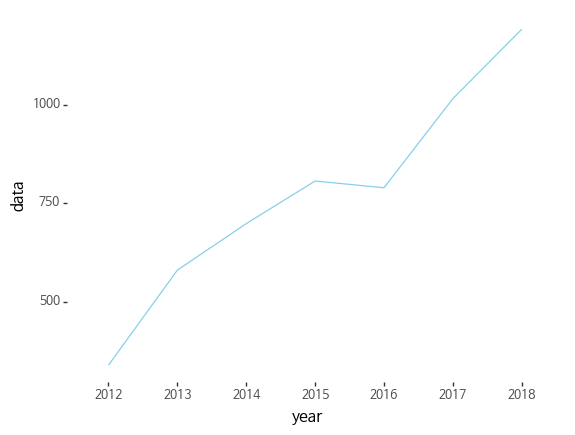

<ggplot: (45300707511)>

In [95]:
(ggplot(df_twit_sum)
 + geom_line(aes('year','data',group=1),color='skyblue')
 + theme(text=element_text(family='NanumBarunGothic'), panel_background=element_rect(fill='white'))
)